In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [268]:
train = pd.read_csv('~/Documents/pair_learning/midterm_project/data files/train.csv')

In [269]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Use seaborn to create a simple heatmap to see missing data

<Axes: >

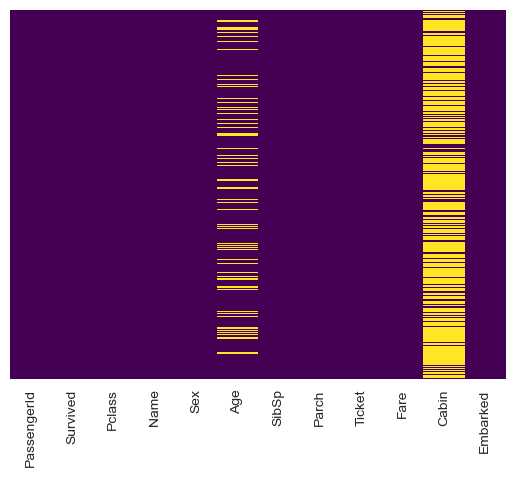

In [270]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Shows there are missing values in the Age and Cabin columns respectively. however, the proportion of missing values in the Cabin column is huge, the column might be reomved eventually.

<Axes: xlabel='Survived', ylabel='count'>

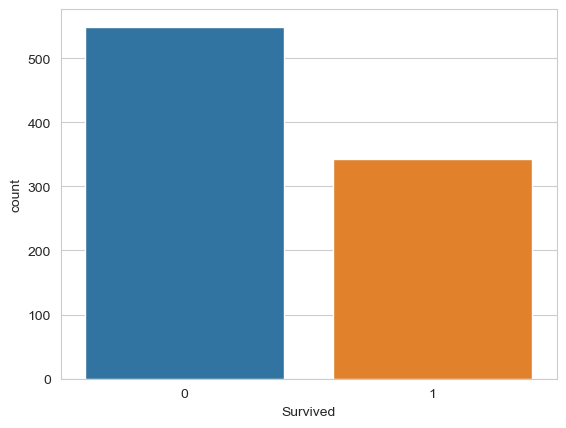

In [271]:
#Count of plot based on the survived column. 
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

This shows that less people survived compared to those who didn't

<Axes: xlabel='Survived', ylabel='count'>

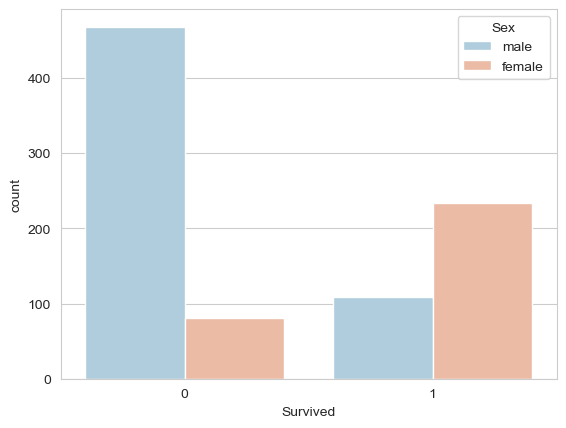

In [206]:
#gender analysis of the survived column
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Sex', data=train, palette='RdBu_r')

Most of the people who did not survive were males, while more females have survived.

<Axes: xlabel='Survived', ylabel='count'>

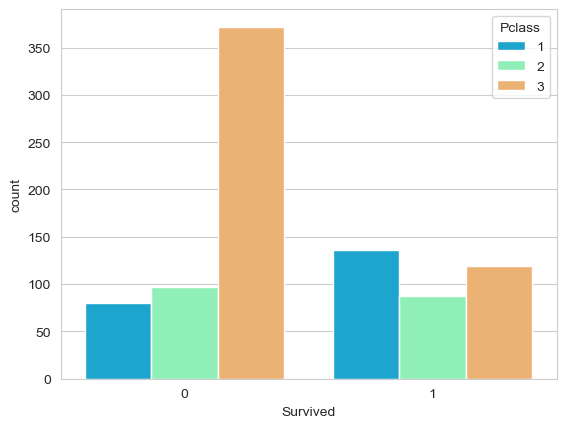

In [207]:
#Analysis of the survived column based on the pyclass
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Pclass', data=train, palette='rainbow')

More of those who died were in class 3. 

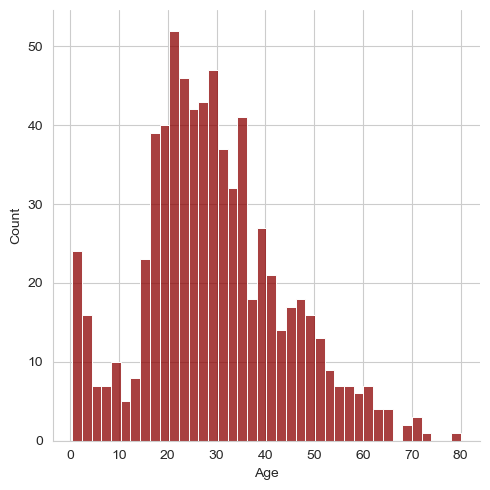

In [208]:
#Distribution of age.
sns.displot(train['Age'].dropna(),kde=False, color = 'darkred', bins=40)

This looks like a normal distribution with some outliers.
bulk of the people in the ship are in the 20 to 40 age bracket

<Axes: xlabel='SibSp', ylabel='count'>

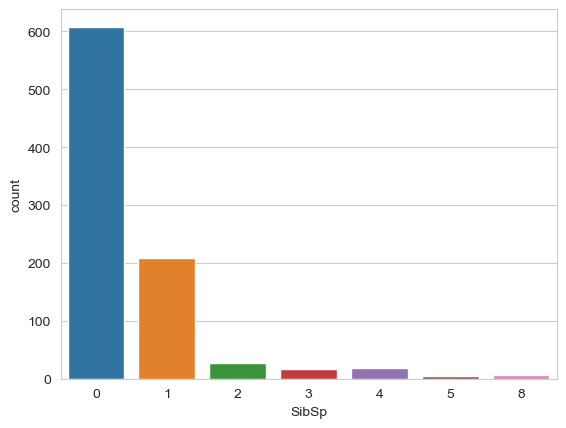

In [209]:
#countplot of sibling or spouse. 
sns.countplot(x='SibSp', data=train)

This gives the count of people who had no sibling or spouse, or had a sinling or spouse on board
More people had no sibling or spouse 

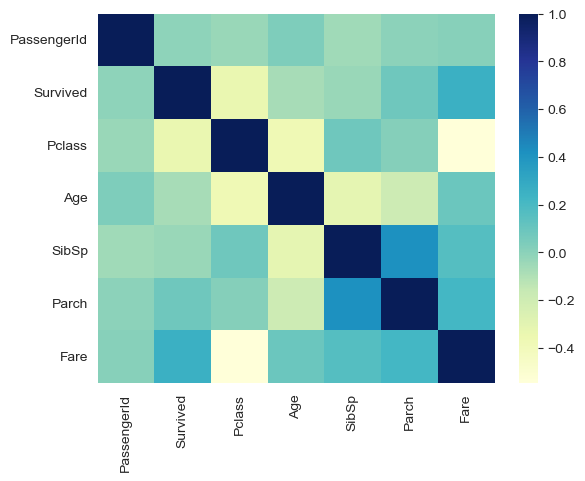

In [273]:
numeric_columns = train.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), cmap="YlGnBu")

plt.show()

Interested in what is correlated to the survival od passengers
the pyclass is highly negatively correlated which means the lower the number in pClass, the higher the survival
One would also notice that, the more people paid for their tickets, the higher the survival chance. 
The Class of passengares and fare are also corelated. 

The similarities shows that we have an equal distribution. 

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This shows that there are null values in the Age and cabin columns

CLEANING NULL VALUES

<Axes: xlabel='Pclass', ylabel='Age'>

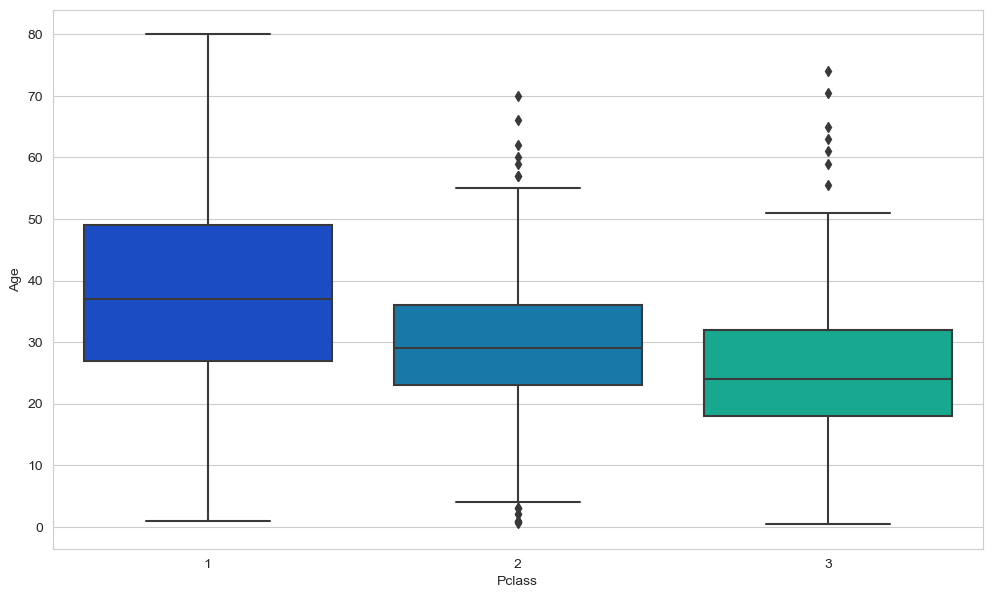

In [215]:
#average age of the people with respect to the passenger class Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

This provides an insight to the age of passengers. 
Average age for class1 =37, class 2= 29, class3 =24
let's use the average age per class to impute missing values in the age column

In [216]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

execute and confirm function

In [217]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)


<Axes: >

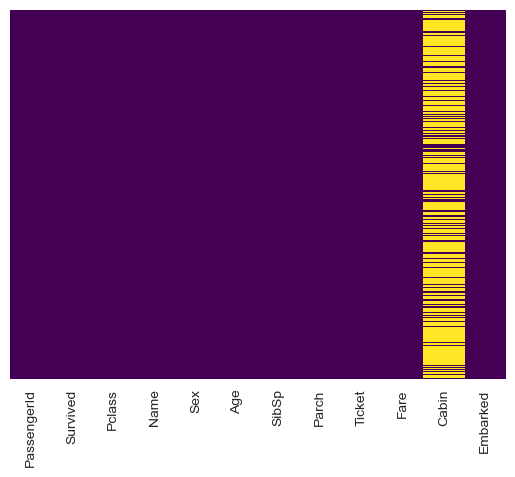

In [218]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Missing values in the age column has been taken care of.

In [219]:
#drop the Cabin column
train.drop('Cabin', axis=1, inplace=True)


<Axes: >

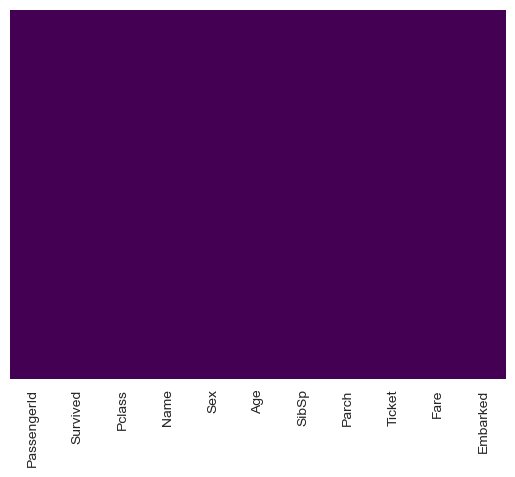

In [220]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [221]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [222]:
train.dropna(inplace=True)

CONVERTING CATEGORICAL FEATURES

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [224]:
pd.get_dummies(train['Embarked'],drop_first=True).astype(int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [225]:
sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(train['Embarked'], drop_first=True).astype(int)


In [226]:
#drop columns that are not required for building model
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)


In [227]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [228]:
#update the categorical variable using pd.concat
train = pd.concat([train, sex, embark], axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


s for embark, male for the sex data
survived column is basically the dependent feature, while others are independent

BUILDING A LOGISTIC REGRESSION

In [229]:
#Split data into training and testing sets
train.drop("Survived", axis=1).head() #Since survived is the dependent variable

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [230]:
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [231]:
#train test split will be done based on the two dataframes up there
from sklearn.model_selection import train_test_split

In [232]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1),
                                                    train["Survived"], test_size=0.30,
                                                    random_state=101)


TRAINING AND PREDICTION

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [235]:
predictions = logmodel.predict(X_test)

In [236]:
from sklearn.metrics import confusion_matrix

In [237]:
accuracy = confusion_matrix(y_test, predictions)

In [238]:
accuracy

array([[149,  14],
       [ 33,  71]])

In [239]:
from sklearn.metrics import accuracy_score

In [240]:
accuracy=accuracy_score(y_test, predictions)
accuracy

0.8239700374531835

In [241]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])